In [3]:
import sys
from pathlib import Path
import os

current_dir = Path.cwd()
project_dir = current_dir.parent
sys.path.append(str(project_dir))

from settings import ANNOTATED_ARTICLES_FILE

import pandas as pd
import matplotlib.pyplot as plt

# Load the annotated articles from the JSON file
annotated_articles = pd.read_json(ANNOTATED_ARTICLES_FILE)


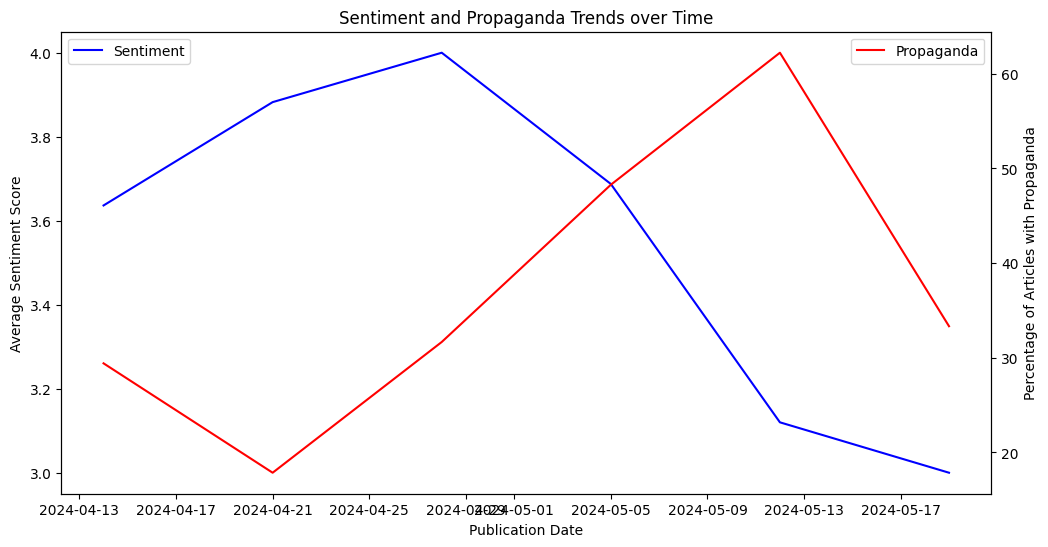

In [4]:
# Extract the publication date from the filename and convert it to a datetime object
annotated_articles['publication_date'] = pd.to_datetime(annotated_articles['filename'].str[:8], format='%Y%m%d')

# Group articles by publication date and calculate average sentiment and propaganda percentage
sentiment_over_time = annotated_articles.groupby(pd.Grouper(key='publication_date', freq='W'))['sentiment_ukraine'].mean()
propaganda_over_time = annotated_articles.groupby(pd.Grouper(key='publication_date', freq='W'))['propaganda'].apply(lambda x: x.eq('Present').mean() * 100)

# Plot sentiment and propaganda trends over time
fig, ax1 = plt.subplots(figsize=(12, 6))
ax2 = ax1.twinx()

ax1.plot(sentiment_over_time.index, sentiment_over_time.values, color='blue', label='Sentiment')
ax1.set_xlabel('Publication Date')
ax1.set_ylabel('Average Sentiment Score')
ax1.legend(loc='upper left')

ax2.plot(propaganda_over_time.index, propaganda_over_time.values, color='red', label='Propaganda')
ax2.set_ylabel('Percentage of Articles with Propaganda')
ax2.legend(loc='upper right')

plt.title('Sentiment and Propaganda Trends over Time')
plt.show()

In [5]:
# Calculate rolling average of sentiment and propaganda
rolling_sentiment = annotated_articles.set_index('publication_date')['sentiment_ukraine'].rolling(window='30D').mean()
rolling_propaganda = annotated_articles.set_index('publication_date')['propaganda'].apply(lambda x: x.eq('Present')).rolling(window='30D').mean() * 100

# Plot rolling average of sentiment and propaganda
fig, ax1 = plt.subplots(figsize=(12, 6))
ax2 = ax1.twinx()

ax1.plot(rolling_sentiment.index, rolling_sentiment.values, color='blue', label='Sentiment')
ax1.set_xlabel('Publication Date')
ax1.set_ylabel('Rolling Average Sentiment Score')
ax1.legend(loc='upper left')

ax2.plot(rolling_propaganda.index, rolling_propaganda.values, color='red', label='Propaganda')
ax2.set_ylabel('Rolling Average Propaganda Percentage')
ax2.legend(loc='upper right')

plt.title('Rolling Average of Sentiment and Propaganda')
plt.show()

AttributeError: 'str' object has no attribute 'eq'

In [ ]:
# Group articles by country and publication date, and calculate average sentiment and propaganda percentage
country_sentiment_over_time = annotated_articles.groupby(['country', pd.Grouper(key='publication_date', freq='W')])['sentiment_ukraine'].mean().unstack()
country_propaganda_over_time = annotated_articles.groupby(['country', pd.Grouper(key='publication_date', freq='W')])['propaganda'].apply(lambda x: x.eq('Present').mean() * 100).unstack()

# Plot sentiment and propaganda trends by country over time
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12), sharex=True)

for country in country_sentiment_over_time.columns:
    ax1.plot(country_sentiment_over_time.index, country_sentiment_over_time[country], label=country)
ax1.set_xlabel('Publication Date')
ax1.set_ylabel('Average Sentiment Score')
ax1.legend(title='Country')
ax1.set_title('Sentiment Trends by Country over Time')

for country in country_propaganda_over_time.columns:
    ax2.plot(country_propaganda_over_time.index, country_propaganda_over_time[country], label=country)
ax2.set_xlabel('Publication Date')
ax2.set_ylabel('Percentage of Articles with Propaganda')
ax2.legend(title='Country')
ax2.set_title('Propaganda Trends by Country over Time')

plt.tight_layout()
plt.show()

In [ ]:
# Extract media outlet from the URL
annotated_articles['media_outlet'] = annotated_articles['url'].apply(lambda x: urlparse(x).netloc)

# Group articles by media outlet and publication date, and calculate average sentiment and propaganda percentage
media_sentiment_over_time = annotated_articles.groupby(['media_outlet', pd.Grouper(key='publication_date', freq='W')])['sentiment_ukraine'].mean().unstack()
media_propaganda_over_time = annotated_articles.groupby(['media_outlet', pd.Grouper(key='publication_date', freq='W')])['propaganda'].apply(lambda x: x.eq('Present').mean() * 100).unstack()

# Plot sentiment and propaganda trends by media outlet over time
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12), sharex=True)

for media in media_sentiment_over_time.columns:
    ax1.plot(media_sentiment_over_time.index, media_sentiment_over_time[media], label=media)
ax1.set_xlabel('Publication Date')
ax1.set_ylabel('Average Sentiment Score')
ax1.legend(title='Media Outlet')
ax1.set_title('Sentiment Trends by Media Outlet over Time')

for media in media_propaganda_over_time.columns:
    ax2.plot(media_propaganda_over_time.index, media_propaganda_over_time[media], label=media)
ax2.set_xlabel('Publication Date')
ax2.set_ylabel('Percentage of Articles with Propaganda')
ax2.legend(title='Media Outlet')
ax2.set_title('Propaganda Trends by Media Outlet over Time')

plt.tight_layout()
plt.show()